###                              Capston Project Notebook

# Capstone Project Notebook

We start by reading in the Boston neighborhoods data set

In [2]:
!wget -q -O 'boston_neighborhoods.csv' http://bostonopendata-boston.opendata.arcgis.com/datasets/3525b0ee6e6b427f9aab5d0a1d0a1a28_0.csv
!ls


boston_neighborhoods.csv


In [4]:
import pandas as pd
import numpy as np
import requests
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Folium imported.')

Solving environment: done

# All requested packages already installed.

Folium imported.


Read the .csv file into a pandas dataframe

In [22]:
df_boston_neighborhoods = pd.read_csv('boston_neighborhoods.csv')
# Could not get a coordinate for Leather District, Harbor Islands in Boston using geocoder. So, dropping those rows
df_boston_neighborhoods = df_boston_neighborhoods[df_boston_neighborhoods.Name != 'Leather District']
df_boston_neighborhoods = df_boston_neighborhoods[df_boston_neighborhoods.Name != 'Harbor Islands']
# South Boston and South Boston Waterfront have the same co-ordinates in geocoder. So, drop South Boston Waterfront.
df_boston_neighborhoods = df_boston_neighborhoods[df_boston_neighborhoods.Name != 'South Boston Waterfront']
df_boston_neighborhoods.reset_index(drop=True, inplace=True)
df_boston_neighborhoods.head(len(df_boston_neighborhoods))

,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493
5,33,Chinatown,76.324410,26,0.12,3.324678e+06,9736.590413
6,34,North End,126.910439,14,0.20,5.527506e+06,16177.826815
7,35,Roxbury,2108.469072,16,3.29,9.184455e+07,49488.800485
8,36,South End,471.535356,32,0.74,2.054000e+07,17912.333569
9,37,Back Bay,399.314411,2,0.62,1.739407e+07,19455.671146


Drop unused columns

In [23]:
df_boston_neighborhoods.drop(columns=['Acres','Neighborhood_ID','SqMiles','ShapeSTArea','ShapeSTLength'], inplace=True)
df_boston_neighborhoods.head()

,OBJECTID,Name
0,27,Roslindale
1,28,Jamaica Plain
2,29,Mission Hill
3,30,Longwood
4,31,Bay Village


Install geocoder

In [7]:
!pip install --upgrade geocoder

import geocoder
print('Imported geocoder')

     |████████████████████████████████| 102kB 14.6MB/s ta 0:00:01
Imported geocoder


Define a function to get the coordinates of a Boston neighborhood using the neighborhood name

In [8]:
def getLatLong(neighborhood):
    lat_long_coords = None
    new_name = '{}, Boston MA'.format(neighborhood)
    print(new_name)
    while(lat_long_coords is None):
        g = geocoder.osm(new_name)
        lat_long_coords = g.latlng
    return lat_long_coords

In [24]:
# Test the getLatLong() function
print(getLatLong('Chinatown')[1])

Chinatown, Boston MA
-71.0626074


Get the co-ordinates for all Boston neighborhoods listed in the df_boston_n eighborhoods dataframe
and store them in the dataframe as new columns

In [25]:
lat_series = pd.Series([])
long_series = pd.Series([])
for i in range(len(df_boston_neighborhoods)):
    neighborhood = df_boston_neighborhoods['Name'][i]
    # The neighborhood 'Downtown' is known as 'Downtown Croaaing' by geocoder.osm()
    if neighborhood == 'Downtown':
        neighborhood = 'Downtown Crossing'
    lat_long = getLatLong(neighborhood)
    lat_series[i] = lat_long[0]
    long_series[i] = lat_long[1]
df_boston_neighborhoods.insert(2,'Latitude', lat_series)
df_boston_neighborhoods.insert(3,'Longitude', long_series)

Roslindale, Boston MA
Jamaica Plain, Boston MA
Mission Hill, Boston MA
Longwood, Boston MA
Bay Village, Boston MA
Chinatown, Boston MA
North End, Boston MA
Roxbury, Boston MA
South End, Boston MA
Back Bay, Boston MA
East Boston, Boston MA
Charlestown, Boston MA
West End, Boston MA
Beacon Hill, Boston MA
Downtown Crossing, Boston MA
Fenway, Boston MA
Brighton, Boston MA
West Roxbury, Boston MA
Hyde Park, Boston MA
Mattapan, Boston MA
Dorchester, Boston MA
South Boston, Boston MA
Allston, Boston MA


In [26]:
df_boston_neighborhoods.head(len(df_boston_neighborhoods))

,OBJECTID,Name,Latitude,Longitude
0,27,Roslindale,42.291209,-71.124497
1,28,Jamaica Plain,42.309820,-71.120330
2,29,Mission Hill,42.332926,-71.103214
3,30,Longwood,42.336168,-71.099527
4,31,Bay Village,42.350011,-71.066948
5,33,Chinatown,42.352217,-71.062607
6,34,North End,42.365097,-71.054495
7,35,Roxbury,42.324843,-71.095016
8,36,South End,42.341310,-71.077230
9,37,Back Bay,42.350707,-71.079730


The Boston neighborhood locations as visualized in a map of Boston

In [64]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Folium imported.')

Solving environment: done

# All requested packages already installed.

Folium imported.


In [65]:
# create map of Boston using latitude and longitude values
latitude=42.36
longitude=-71.05
map_boston = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_boston_neighborhoods['Latitude'], df_boston_neighborhoods['Longitude'], df_boston_neighborhoods['Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston)  
    
map_boston

Set up credentials and other input parameters for the FourSquare API

In [27]:
CLIENT_ID = '03EGP3GMRGUSVEIXBKS5URHQ1LG34UOYP1X25MOJUNCBHQBV' # your Foursquare ID
CLIENT_SECRET = 'URD3FVLO3IJOJEPDSEZOZ3RGB0ZBTHB1W5KHUDKYIEXXD1TL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

LIMIT=100
radius=500

Your credentails:
CLIENT_ID: 03EGP3GMRGUSVEIXBKS5URHQ1LG34UOYP1X25MOJUNCBHQBV
CLIENT_SECRET:URD3FVLO3IJOJEPDSEZOZ3RGB0ZBTHB1W5KHUDKYIEXXD1TL


Define a function to get the nearby venues for a Boston neighborhood given the co-ordinates of the neighborhood

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new dataframe with the boston neighborhood venues

In [29]:
boston_venues = getNearbyVenues(names=df_boston_neighborhoods['Name'],
                                   latitudes=df_boston_neighborhoods['Latitude'],
                                   longitudes=df_boston_neighborhoods['Longitude']
                                  )
boston_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Roslindale,42.291209,-71.124497,Peters Hill,42.293617,-71.128063,Scenic Lookout
1,Roslindale,42.291209,-71.124497,Roslindale House Of Pizza,42.287989,-71.126549,Pizza Place
2,Roslindale,42.291209,-71.124497,Arboretum Grill,42.291787,-71.122497,American Restaurant
3,Roslindale,42.291209,-71.124497,Target,42.288204,-71.126659,Big Box Store
4,Roslindale,42.291209,-71.124497,BCYF- Flaherty Pool,42.288133,-71.122913,Pool


To get a relationship table of neighborhoods to their venues, perform a one-hot encoding

In [30]:
# one hot encoding
boston_onehot = pd.get_dummies(boston_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boston_onehot['Name'] = boston_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [boston_onehot.columns[-1]] + list(boston_onehot.columns[:-1])
boston_onehot = boston_onehot[fixed_columns]

boston_onehot.head()

,Name,Accessories Store,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Tour Provider,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Roslindale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Roslindale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Roslindale,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Roslindale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Roslindale,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Group by neighborhood name

In [31]:
boston_grouped = boston_onehot.groupby('Name').mean().reset_index()
boston_grouped

,Name,Accessories Store,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,...,Tour Provider,Tourist Information Center,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Allston,0.000000,0.000000,0.000000,0.012195,0.00,0.00000,0.024390,0.000000,0.012195,...,0.00,0.00,0.00,0.036585,0.00,0.012195,0.000000,0.000000,0.00,0.000000
1,Back Bay,0.020000,0.050000,0.000000,0.010000,0.00,0.00000,0.000000,0.010000,0.000000,...,0.01,0.00,0.00,0.000000,0.00,0.010000,0.000000,0.000000,0.02,0.000000
2,Bay Village,0.000000,0.032609,0.000000,0.000000,0.00,0.01087,0.021739,0.000000,0.000000,...,0.00,0.00,0.00,0.010870,0.00,0.021739,0.000000,0.010870,0.00,0.010870
3,Beacon Hill,0.000000,0.028986,0.000000,0.000000,0.00,0.00000,0.000000,0.014493,0.000000,...,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.014493
4,Brighton,0.000000,0.020000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.020000,0.00,0.000000
5,Charlestown,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.027027,0.000000,...,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000
6,Chinatown,0.000000,0.020000,0.000000,0.000000,0.00,0.00000,0.080000,0.000000,0.000000,...,0.00,0.01,0.00,0.010000,0.00,0.020000,0.010000,0.000000,0.00,0.000000
7,Dorchester,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.076923,0.00,0.000000,0.000000,0.000000,0.00,0.000000
8,Downtown,0.000000,0.040000,0.000000,0.000000,0.00,0.00000,0.020000,0.010000,0.000000,...,0.00,0.01,0.00,0.010000,0.01,0.000000,0.010000,0.010000,0.00,0.000000
9,East Boston,0.000000,0.028571,0.000000,0.028571,0.00,0.00000,0.000000,0.000000,0.000000,...,0.00,0.00,0.00,0.000000,0.00,0.028571,0.000000,0.000000,0.00,0.000000


Provide a listing of the top 10 venues for each neighborhood

In [32]:
num_top_venues = 10

for hood in boston_grouped['Name']:
    print("----"+hood+"----")
    temp = boston_grouped[boston_grouped['Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
                           venue  freq
0              Korean Restaurant  0.07
1             Chinese Restaurant  0.04
2                Thai Restaurant  0.04
3                    Pizza Place  0.04
4  Vegetarian / Vegan Restaurant  0.04
5                         Bakery  0.04
6             Italian Restaurant  0.02
7                 Sandwich Place  0.02
8                Bubble Tea Shop  0.02
9             Mexican Restaurant  0.02


----Back Bay----
                 venue  freq
0          Coffee Shop  0.05
1  American Restaurant  0.05
2   Italian Restaurant  0.04
3       Clothing Store  0.04
4                Hotel  0.04
5   Seafood Restaurant  0.04
6       Ice Cream Shop  0.03
7       Cosmetics Shop  0.03
8                  Gym  0.03
9                  Spa  0.03


----Bay Village----
                venue  freq
0      Sandwich Place  0.05
1               Hotel  0.05
2             Theater  0.04
3  Italian Restaurant  0.04
4              Bakery  0.04
5  Seafood Restaurant  0.04

Create a dataframe of the top 10 venues for each neighborhood

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = boston_grouped['Name']

for ind in np.arange(boston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(25)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Korean Restaurant,Bakery,Pizza Place,Vegetarian / Vegan Restaurant,Chinese Restaurant,Thai Restaurant,Sandwich Place,Bubble Tea Shop,Pharmacy,Italian Restaurant
1,Back Bay,American Restaurant,Coffee Shop,Italian Restaurant,Seafood Restaurant,Clothing Store,Hotel,Cosmetics Shop,Spa,Sporting Goods Shop,Ice Cream Shop
2,Bay Village,Sandwich Place,Hotel,Italian Restaurant,Seafood Restaurant,Bakery,Theater,Steakhouse,Chinese Restaurant,Spa,Coffee Shop
3,Beacon Hill,Pizza Place,Italian Restaurant,Hotel Bar,Playground,Museum,Coffee Shop,French Restaurant,Plaza,Hotel,Sushi Restaurant
4,Brighton,Coffee Shop,Bakery,Pub,Chinese Restaurant,Bus Station,Bank,Pizza Place,Grocery Store,Dry Cleaner,Deli / Bodega
5,Charlestown,Pizza Place,Coffee Shop,Liquor Store,Gastropub,Pub,Convenience Store,Italian Restaurant,Mobile Phone Shop,Chinese Restaurant,Plaza
6,Chinatown,Chinese Restaurant,Asian Restaurant,Bakery,Coffee Shop,Sushi Restaurant,Theater,Pizza Place,Sandwich Place,Performing Arts Venue,Seafood Restaurant
7,Dorchester,Market,Donut Shop,Caribbean Restaurant,Diner,Breakfast Spot,Nail Salon,Plaza,Café,Pizza Place,Vegetarian / Vegan Restaurant
8,Downtown,Coffee Shop,Sandwich Place,American Restaurant,Falafel Restaurant,New American Restaurant,Restaurant,Historic Site,Gym / Fitness Center,Chinese Restaurant,Hotel
9,East Boston,Latin American Restaurant,Mexican Restaurant,Convenience Store,Park,Pharmacy,Pizza Place,Sandwich Place,Donut Shop,Seafood Restaurant,Market


Create a new dataframe to store the information for Pizza stores, Hotels, and select fast food shops including coffee shop, sandwich place and donut shop.

These venues are relevant to the guidelines provided by the customer.

A plot of these columns will provide a visual comparison of these venues which can aid in the decision making process for locating the new pizza stores.

In [54]:
df_pizza = boston_grouped[['Name', 'Pizza Place','Hotel','Coffee Shop','Sandwich Place','Donut Shop']]
df_pizza_sorted = df_pizza.sort_values('Pizza Place', ascending=False).reset_index(drop=True)
df_pizza_sorted[['Pizza Place','Hotel','Coffee Shop','Sandwich Place','Donut Shop']] *= 100
df_pizza_sorted

,Name,Pizza Place,Hotel,Coffee Shop,Sandwich Place,Donut Shop
0,Roslindale,20.000000,0.000000,0.000000,0.000000,10.000000
1,Hyde Park,14.285714,0.000000,0.000000,0.000000,7.142857
2,South Boston,12.820513,0.000000,5.128205,2.564103,0.000000
3,Charlestown,10.810811,0.000000,8.108108,0.000000,2.702703
4,Mission Hill,8.333333,0.000000,4.166667,8.333333,8.333333
5,Dorchester,7.692308,0.000000,0.000000,0.000000,7.692308
6,West End,7.058824,4.705882,4.705882,7.058824,4.705882
7,Brighton,6.000000,0.000000,6.000000,2.000000,2.000000
8,Beacon Hill,5.797101,2.898551,2.898551,0.000000,0.000000
9,East Boston,5.714286,0.000000,2.857143,5.714286,5.714286


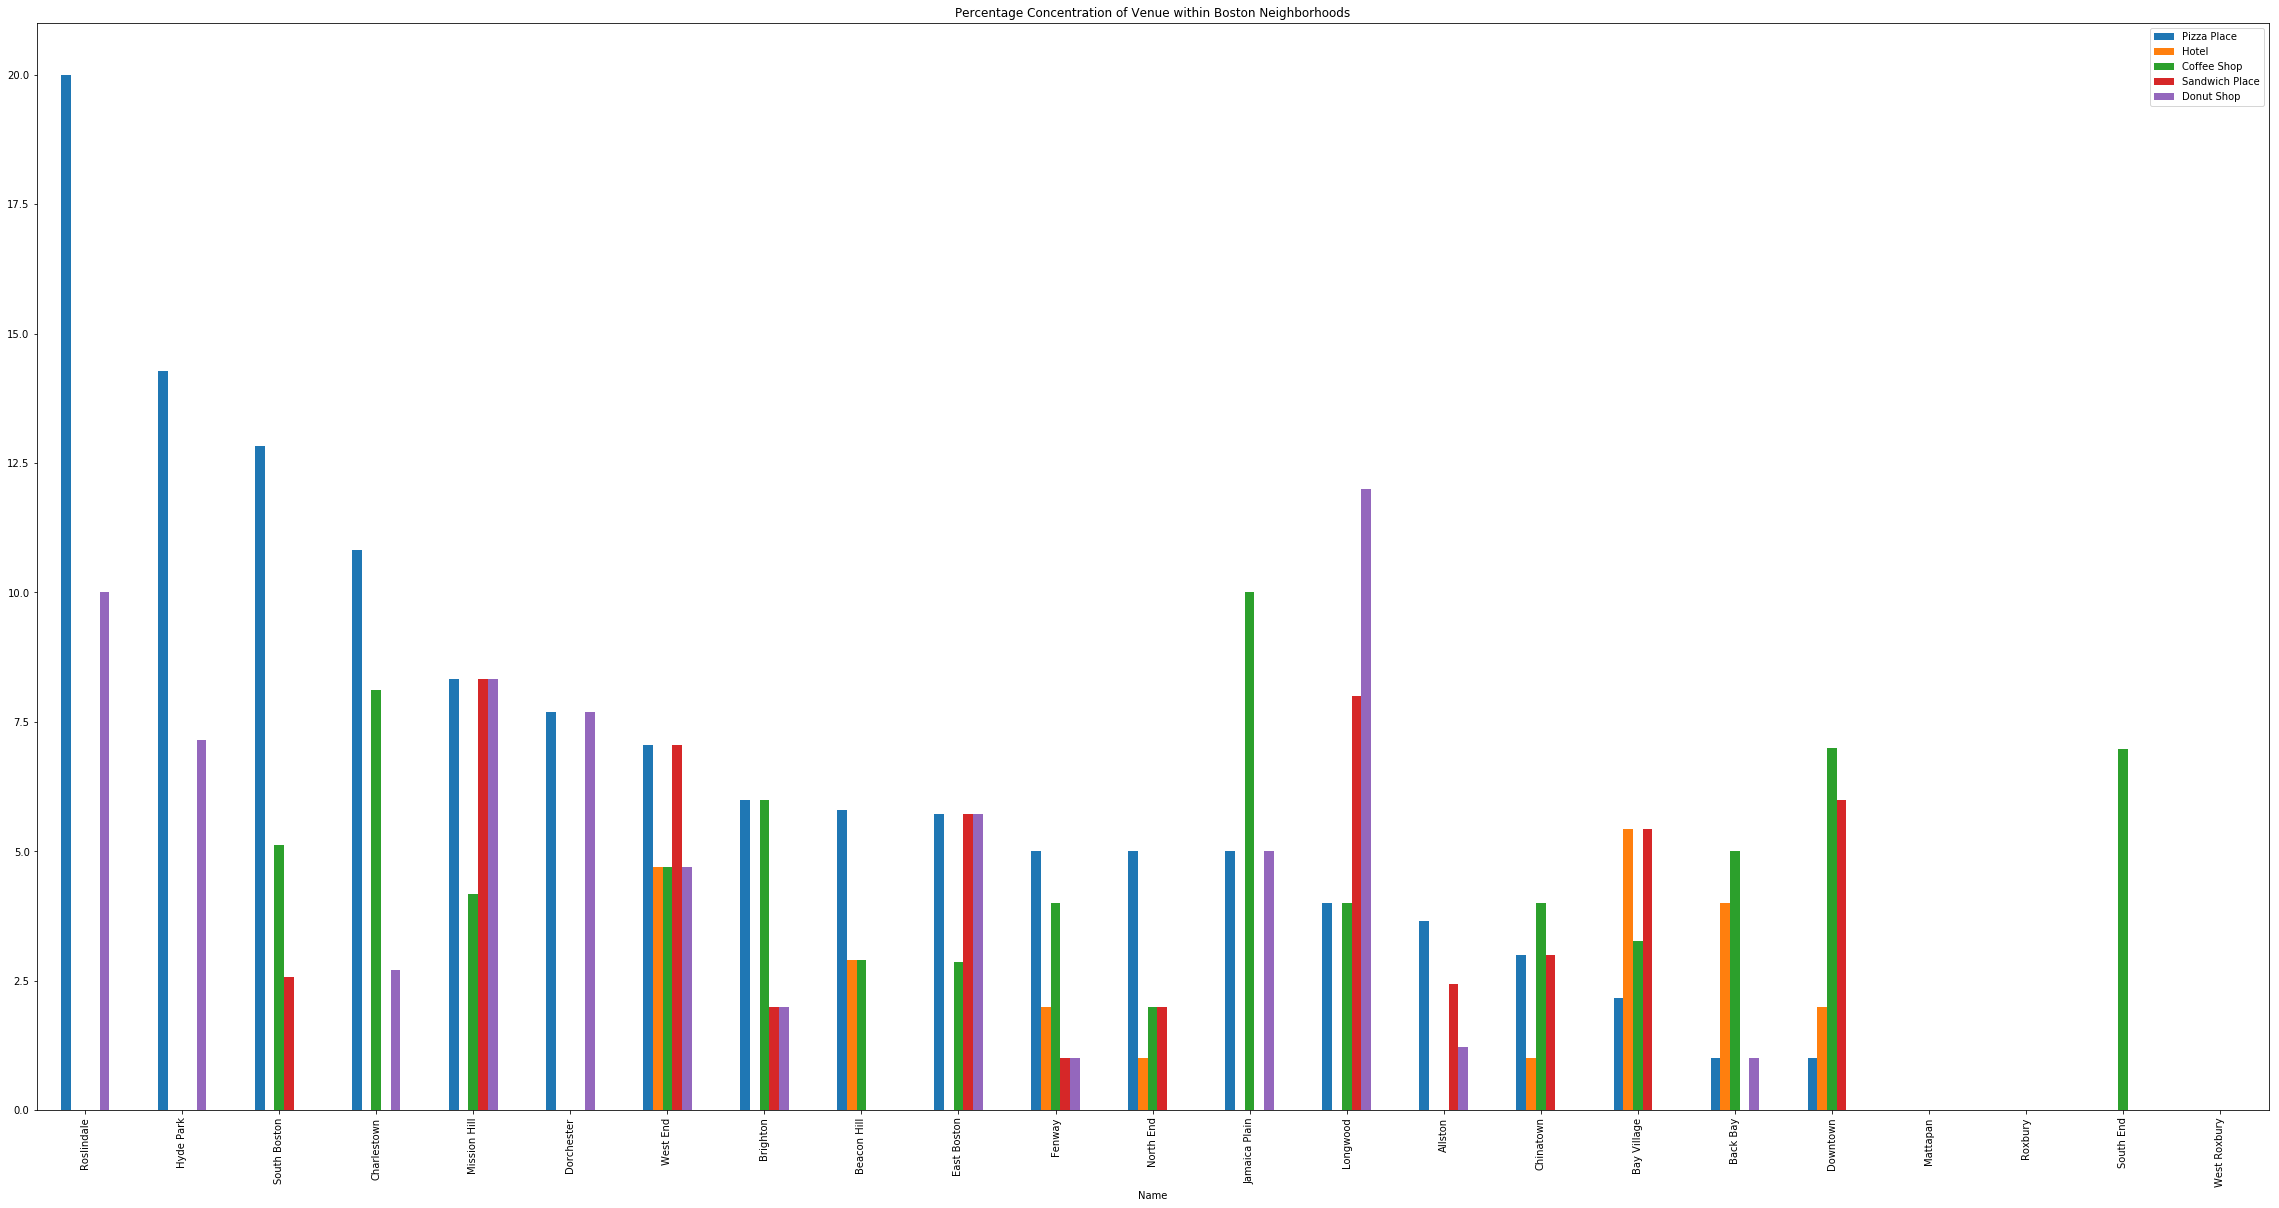

In [63]:
df_pizza_sorted.plot(kind='bar',x='Name',figsize=(40,20),title='Percentage Concentration of Venue within Boston Neighborhoods')